# **Практическое занятие 16. Методы кластеризации (задание 4)**

Коптев Данил

**Подключим библиотеки**

In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

**Задание 4 (дополнительно)**

Имеется база (файлы X_train.txt, X_test.txt, y_train.txt, y_test.txt) с данными о перемещениях пользователей мобильных телефонов, которые используются для детектирования падений. На  начальном  этапе  необходимо  научить  систему  различать  разные  типы  движенияпользователей. В наборе данныхимеются разметки для состояния пользователя телефона:1 –ходьба, 2 –подъем вверх по лестнице, 3 –спуск по лестнице, 4 –сидя, 5 –стоя, 6 –лежа.Написатьпрограммный  код  для  кластеризации  пользователей  по  типу  движения  с применением понижения размерностиданных. Обучить алгоритмы кластеризации двумя методами на исходных и редуцированных данных, сравнить результаты кластеризации.Пояснение. Задача  понижения  размерности данных состоит  в  формировании  новых признаков на основе исходных. При этом: количество признаков должно стать меньше, но новые признаки должны сохранять как можно больше информации, присутствующей в исходных.Широко  используемый  метод  понижения  размерности–метод главных компонент (Principal Component Analysis,PCA).Одна из возможных интерпретаций метода –нахождение в исходном многомерном пространстве попарно ортогональных направлений (главных компонент),вдоль которых данныеимеют наибольший разброс (выборочную дисперсию). Описание в sklearn.

1. Загрузить данные в DataFrameпри помощи функции np.loadtxt()с параметром encoding = "ANSI".Вывести несколько первых записей иразмерности для контроля.

In [67]:
# Загрузка данных
X_train = np.loadtxt('X_train.txt')
X_test = np.loadtxt('X_test.txt')
y_train = np.loadtxt('y_train.txt')
y_test = np.loadtxt('y_test.txt')

2. Поскольку в данной задаче тренировочная выборка не нужна, объединитьX_trainс X_test, а y_train–с y_test.

In [68]:
# Объединение данных
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Вывод размерности
print(X.shape)
print(y.shape)

(10299, 561)
(10299,)


In [69]:
n_classes = np.unique(y).size
n_classes

6

In [70]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

*Уникальных значений 6*

3. Отмасштабироватьвыборку с помощью StandardScalerс параметрами по умолчанию.

In [71]:
# Масштабируем выборку
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Использовать  методPCAдля пониженияразмерности  данных,оставивстолько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных.

In [72]:
pca = PCA(0.90,random_state=17)
pca.fit(X_scaled)
trans=pca.transform(X_scaled)
print(len(trans[0]))
print(trans[0])
pca.explained_variance_ratio_

65
[-16.38097982   1.99508307   3.41569023  -0.64985796   7.82506184
  -2.7719639    2.29828533   5.22772253  -1.33552994  -3.76013017
  -0.6961996   -1.50767068   0.81930971  -1.27325746  -2.23557324
   0.05309056   0.40967512  -3.42022876   2.95587083   0.04228637
   4.31263887  -0.23038119  -2.67236839   0.03482392  -1.37584849
  -2.99388802  -2.6072202   -1.3096463    1.78297752  -2.11450711
  -1.90024087   0.4407093   -0.78451706  -0.8870831    0.73443109
  -0.70051302   0.21052502   1.83304154   1.72449671  -0.13154106
  -0.51535729  -1.86098372   1.46780181   1.04705188  -0.58895466
  -2.69919366   1.14101642  -1.47382797   0.75225118   1.57961328
  -0.94558887  -1.53178831  -0.75512178   0.62045485   0.04053366
  -1.50603468  -0.78121815   2.29825091   0.76263443  -0.79377315
  -0.96693123  -0.53817505   0.34256962  -0.24397444  -1.94678658]


array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765863, 0.00676668, 0.00630242,
       0.00615718, 0.00595335, 0.00577195, 0.00563431, 0.0054083 ,
       0.00518828, 0.00502742, 0.00473229, 0.00463818, 0.00446848,
       0.00439868, 0.00416863, 0.00400809, 0.00389072, 0.00381339,
       0.0036687 , 0.00364357, 0.00349225, 0.00346736, 0.00335539,
       0.00329411, 0.00323824, 0.00300508, 0.00294254, 0.00290452,
       0.00275765, 0.00269864, 0.00264196, 0.0025803 , 0.00255031,
       0.00247776, 0.00245537, 0.0023829 , 0.00235902, 0.00232044,
       0.0022836 , 0.00219182, 0.00212631, 0.00209145, 0.0020348 ,
       0.00201167, 0.00198111, 0.00194391, 0.00192509, 0.00189539,
       0.00186403, 0.00182923, 0.00180956, 0.00176364, 0.00174188])

5. Вывести минимальное число компоненти процент дисперсии, который приходится на первую главную компоненту.

In [73]:
print('Минимальное число компоненти:', pca.n_components_)
print("Процент дисперсии", round(pca.explained_variance_ratio_[0] * 100))

Минимальное число компоненти: 65
Процент дисперсии 51


6. Визуализироватьданные в проекции на первые две главные компоненты:

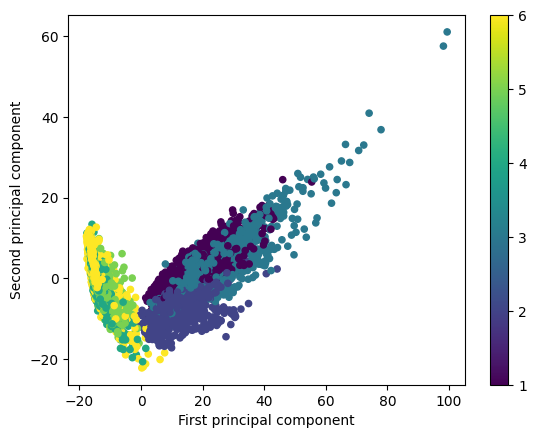

In [74]:
plt.scatter(trans[:,0],trans[:,1],s=20, c=y, cmap='viridis')
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

7. Обучить моделькластеризации данных методом k-meansна данных со сниженной за счет PCAразмерностью. Использовать значения параметров: n_clusters= n_classes(число уникальных меток целевого класса), n_init = 100, random_state = 17(для воспроизводимости результата).

In [75]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=17)
kmeans.fit(trans)

print('Cluster labels:', kmeans.predict(trans))

Cluster labels: [1 1 1 ... 0 0 0]


8. Визуализироватьданные в проекции на первые две главные компоненты. Раскраситьточки в соответствии с полученными метками кластеров.

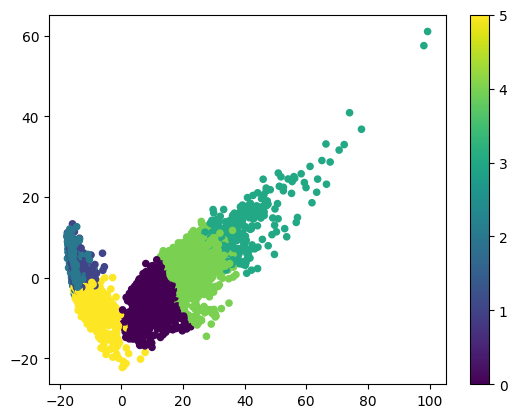

In [76]:
# Визуализация данных в проекции на первые две главные компоненты
plt.scatter(trans[:, 0], trans[:, 1], s=20, c=kmeans.labels_, cmap='viridis')
plt.colorbar()
plt.show()

9. Определить максимальную долю объектов в классе, отнесенных к какому-то одному кластеру.

In [77]:
pd.crosstab(y, kmeans.labels_, margins=True)

col_0,0,1,2,3,4,5,All
row_0,,,,,,,
1.0,903,0,0,78,741,0,1722
2.0,1241,0,0,5,296,2,1544
3.0,320,0,0,196,890,0,1406
4.0,1,1235,91,0,0,450,1777
5.0,0,1344,0,0,0,562,1906
6.0,5,52,1558,0,0,329,1944
All,2470,2631,1649,279,1927,1343,10299


В данном примере, для класса "спуск по лестнице" существует 3 кластера, и максимальная доля объектов в каждом кластере составляет:

* кластер 1: 900 / 1406 $\approx$ 0.64
* кластер 3: 500 / 1406 $\approx$ 0.36
* кластер 6: 6 / 1406 $\approx$ 0.04

Таким образом, максимальная доля объектов в классе, отнесенных к кластеру 1, составляет 0.64.

10. Выбрать оптимальное количество кластеров при помощи Inertia. Параметры алгоритма и данные использовать те же, чтоираньше (изменятьтолькоn_clusters).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

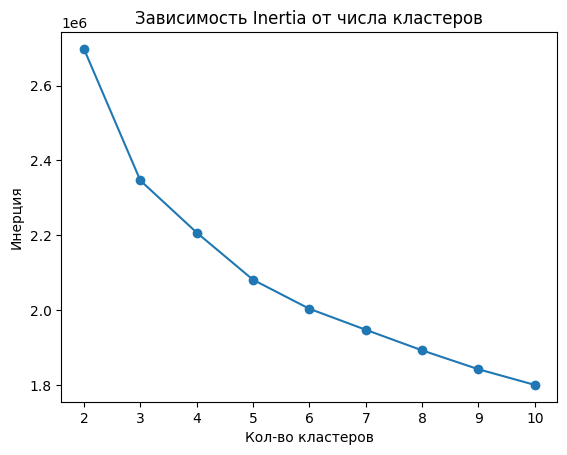

In [78]:
inertia = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(trans)
  inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, 'o-')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инерция')
plt.title('Зависимость Inertia от числа кластеров')
plt.show()

*Наиболее предпочтительное для нас число класторизации - 3-5*

11. Выполнить кластеризацию данных со сниженной за счет PCA размерностью с помощью метода DBSCAN, подобрав наиболее удачные значения параметров.

12. Оценить качество полученных моделей кластеризации. Сделать выводы.

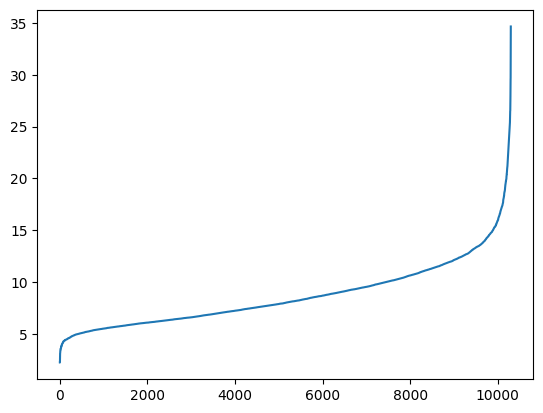

In [87]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(trans)
distances, indices = neighbors_fit.kneighbors(trans)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Как мы видим оптимально значение ESP является от 10 до 20, так как именно оно приходится на перегиб

Протестируем для нахождения наиболее точного ESP и сравним сразу метрики

In [88]:
a = range(10,20)

models_score_array = []

for i in a:
  models = DBSCAN(eps=i).fit(trans)
  labels = models.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  if len(set(labels))>1:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), silhouette_score(X,labels), n_clusters_, n_noise_))
  else:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), 0, n_clusters_, n_noise_))
  

pd.DataFrame(models_score_array, columns=['EPC', 'V-мера', 'ARI', 'Силуэт', 'Количество кластеров', 'Значение шума'])

,EPC,V-мера,ARI,Силуэт,Количество кластеров,Значение шума
0,10,0.397770,0.247107,0.067533,29,3884
1,11,0.449589,0.301548,0.134047,26,2717
2,12,0.472397,0.320806,0.193392,22,1907
3,13,0.103866,0.033512,0.053645,14,1256
4,14,0.074044,0.018201,-0.129849,7,814
5,15,0.055842,0.011059,-0.114344,6,573
6,16,0.033174,0.005827,0.157013,5,374
7,17,0.022152,0.003688,0.247495,1,293
8,18,0.019193,0.002735,0.043701,2,226
9,19,0.016250,0.002024,0.261336,2,163


In [90]:
a = [12.1, 12.2, 12.3, 12.4, 12.5, 12.6,12.7, 12.8, 12.9, 13]

models_score_array = []

for i in a:
  models = DBSCAN(eps=i).fit(trans)
  labels = models.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  if len(set(labels))>1:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), silhouette_score(X,labels), n_clusters_, n_noise_))
  else:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), 0, n_clusters_, n_noise_))
  

pd.DataFrame(models_score_array, columns=['EPC', 'V-мера', 'ARI', 'Силуэт', 'Количество кластеров', 'Значение шума'])

,EPC,V-мера,ARI,Силуэт,Количество кластеров,Значение шума
0,12.1,0.474343,0.321666,0.197560,20,1845
1,12.2,0.476218,0.322206,0.197646,21,1771
2,12.3,0.477700,0.322585,0.192645,23,1702
3,12.4,0.479870,0.322832,0.193336,26,1616
4,12.5,0.482435,0.323267,0.194872,25,1556
5,12.6,0.484115,0.323811,0.203329,22,1473
6,12.7,0.123175,0.041843,0.027454,20,1421
7,12.8,0.118340,0.039117,0.029512,18,1352
8,12.9,0.112531,0.036711,0.027313,17,1309
9,13.0,0.103866,0.033512,0.053645,14,1256


In [91]:
a = [12.61, 12.62, 12.63, 12.64, 12.65, 12.66,12.67, 12.68, 12.69, 12.7]

models_score_array = []

for i in a:
  models = DBSCAN(eps=i).fit(trans)
  labels = models.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  if len(set(labels))>1:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), silhouette_score(X,labels), n_clusters_, n_noise_))
  else:
    models_score_array.append((i, v_measure_score(y,labels), adjusted_rand_score(y,labels), 0, n_clusters_, n_noise_))
  

pd.DataFrame(models_score_array, columns=['EPC', 'V-мера', 'ARI', 'Силуэт', 'Количество кластеров', 'Значение шума'])

,EPC,V-мера,ARI,Силуэт,Количество кластеров,Значение шума
0,12.61,0.483862,0.323549,0.202645,22,1469
1,12.62,0.483883,0.323545,0.202663,22,1467
2,12.63,0.483898,0.323469,0.202776,22,1462
3,12.64,0.483831,0.323364,0.202847,22,1456
4,12.65,0.484012,0.323437,0.203252,22,1453
5,12.66,0.484349,0.323527,0.203510,22,1448
6,12.67,0.484141,0.323163,0.204002,22,1433
7,12.68,0.123483,0.042252,0.027450,20,1431
8,12.69,0.123503,0.042245,0.027412,20,1430
9,12.70,0.123175,0.041843,0.027454,20,1421


13. По результатам проведенного исследования оформить отчет.

**Отчет**

Самое оптимальный EPC является 12.66, далее идет уменьшее показателей

DBSCAN с EPC равным **12.66**: 

* V-мера: 0.484349	

* ARI: 0.323527	

* Силуэт: 0.203510	

* Количество кластеров: 22	

* Значение шума: 1448

Таким образом, можно сделать вывод, что кластеризация с EPC равным 12.66 является хорошей, но не оптимальной. Для получения лучшей кластеризации необходимо использовать другие метрики качества кластеризации и подобрать оптимальные параметры для метода DBSCAN.